
# 🏝️ Treasure Hunt: Divide and Conquer Example

This notebook presents a **real-world style word problem** — the *Treasure Map Puzzle* — that can be solved efficiently using the **Divide and Conquer** approach.  
It also explores why other paradigms (Brute Force, Greedy, Dynamic Programming, Backtracking) are *not* as suitable, and finally compares the Divide & Conquer method with a simple Brute Force linear scan.



## 🧩 Problem Statement

An archaeologist has discovered a huge **satellite image of an island**, represented as an `N x N` grid of terrain elevations.  
A buried treasure is hidden at the **lowest elevation point** on the island.

Unfortunately:
- The file is too large to fit into memory at once.  
- Each grid read operation is slow and costly.

The archaeologist needs to find the **global minimum elevation** efficiently.



## 🎯 Divide & Conquer Approach Identification

We want to find a global property (minimum elevation) over a dataset that can be divided into smaller parts.

✅ **Divide & Conquer** fits perfectly here:

1. **Divide:** Split the grid into four quadrants (NW, NE, SW, SE).  
2. **Conquer:** Recursively find the minimum in each quadrant.  
3. **Combine:** Take the smallest of the four minima.


In [1]:

def find_min_elevation(grid):
    n = len(grid)
    if n == 1:
        return grid[0][0]

    mid = n // 2
    quadrants = [
        [row[:mid] for row in grid[:mid]],   # NW
        [row[mid:] for row in grid[:mid]],   # NE
        [row[:mid] for row in grid[mid:]],   # SW
        [row[mid:] for row in grid[mid:]]    # SE
    ]
    minima = [find_min_elevation(q) for q in quadrants]
    return min(minima)


# Example grid (elevations)
grid = [
    [42, 35, 28, 31],
    [38, 33, 22, 27],
    [48, 40, 30, 29],
    [55, 49, 25, 20]
]

print("Grid (elevations):")
for row in grid:
    print(row)

print("\nLowest elevation found:", find_min_elevation(grid))


Grid (elevations):
[42, 35, 28, 31]
[38, 33, 22, 27]
[48, 40, 30, 29]
[55, 49, 25, 20]

Lowest elevation found: 20



## 🧮 Complexity Analysis

The recurrence relation is:

\[ T(n) = 4T(n/2) + O(1) \]

By the **Master Theorem**,  
\[ T(n) = O(n^2) \]

Although the total time complexity is similar to scanning all cells, this Divide and Conquer version:

- Uses less memory at any one time.  
- Can be **parallelized** (each quadrant computed independently).  
- Makes it easy to run on **distributed systems**.



## 🔍 Applicability of Other Paradigms


In [2]:

import pandas as pd

data = {
    'Approach': ['Brute Force', 'Greedy', 'Dynamic Programming', 'Backtracking', 'Divide & Conquer'],
    'Applicable': ['✅', '❌', '❌', '❌', '✅'],
    'Explanation': [
        'Scan all elements — simple but memory-heavy.',
        'No local rule guarantees the global minimum.',
        'No overlapping subproblems; each cell is independent.',
        'No path or constraint exploration needed.',
        'Independent subgrids, easy to combine and parallelize.'
    ]
}

df = pd.DataFrame(data)
df


,Approach,Applicable,Explanation
0,Brute Force,✅,Scan all elements — simple but memory-heavy.
1,Greedy,❌,No local rule guarantees the global minimum.
2,Dynamic Programming,❌,No overlapping subproblems; each cell is indep...
3,Backtracking,❌,No path or constraint exploration needed.
4,Divide & Conquer,✅,"Independent subgrids, easy to combine and para..."



## 💡 Discussion Prompts

- Why doesn’t a greedy “go to lowest neighbor” rule guarantee success?  
  → It might get stuck in a **local minimum**.

- What if accessing each grid cell were *very slow*?  
  → We could approximate or sample each quadrant — still Divide & Conquer logic.

- How could we parallelize this algorithm?  
  → Process each quadrant on a different core or node.



## 🧠 Extensions and Variations

1. **Median of Terrain Heights:**  
   Modify the algorithm to find the *median elevation* instead of the minimum.  
   Still a Divide & Conquer structure, but with different combining logic.

2. **Maximum Elevation Path:**  
   If you must find a path of maximum elevation — overlapping subproblems appear → **Dynamic Programming**.

3. **Treasure with Movement Rules:**  
   If you can move only in four directions to find the lowest neighbor, it becomes a **Backtracking** problem.



## ✅ Summary Table

| Paradigm | Fit for Problem | Why |
|-----------|----------------|------|
| Brute Force | ✅ | Works but inefficient |
| Greedy | ❌ | Local minima trap possible |
| Dynamic Programming | ❌ | No overlapping subproblems |
| Backtracking | ❌ | No path exploration |
| Divide & Conquer | ✅ | Independent subgrids, parallelizable |



# ⚔️ Brute Force vs Divide & Conquer Comparison



Now, let's compare both approaches on synthetic data to observe their performance and scalability differences.


In [4]:

def brute_force_min(grid):
    min_val = float('inf')
    for row in grid: # so outer loop O(n)
        for val in row: # inner loop also O(n) THUS complexity is O(n^2)
            if val < min_val:
                min_val = val
    return min_val


In [5]:

import random

def generate_grid(n, max_val=10000):
    return [[random.randint(0, max_val) for _ in range(n)] for _ in range(n)]

grid = generate_grid(8)
print("Example 8x8 grid:")
for row in grid:
    print(row)


Example 8x8 grid:
[6620, 7691, 9941, 557, 8283, 2397, 3882, 2085]
[5397, 1592, 866, 4731, 5850, 6696, 2321, 8135]
[5732, 4198, 7196, 822, 8667, 9953, 548, 3705]
[940, 4765, 648, 765, 8698, 7752, 2098, 6723]
[8489, 152, 1122, 4112, 185, 4204, 5525, 7534]
[280, 1423, 2988, 2672, 3758, 9628, 4168, 5986]
[8427, 7605, 6388, 459, 1304, 2571, 3351, 4956]
[8036, 823, 5620, 6980, 8929, 6457, 6748, 4635]


## ✅ Correctness Check

In [6]:

bf_min = brute_force_min(grid)
dc_min = find_min_elevation(grid)
print(f"Brute Force minimum: {bf_min}")
print(f"Divide & Conquer minimum: {dc_min}")
assert bf_min == dc_min


Brute Force minimum: 152
Divide & Conquer minimum: 152


## ⏱️ Timing Comparison

In [7]:

import timeit

for size in [32, 64, 128, 256, 512, 1024]:
    grid = generate_grid(size)
    bf_time = timeit.timeit(lambda: brute_force_min(grid), number=3)
    dc_time = timeit.timeit(lambda: find_min_elevation(grid), number=3)
    print(f"Grid size {size}x{size}:  Brute Force = {bf_time:.4f}s,  Divide & Conquer = {dc_time:.4f}s")


Grid size 32x32:  Brute Force = 0.0001s,  Divide & Conquer = 0.0026s
Grid size 64x64:  Brute Force = 0.0003s,  Divide & Conquer = 0.0091s
Grid size 128x128:  Brute Force = 0.0010s,  Divide & Conquer = 0.0359s
Grid size 256x256:  Brute Force = 0.0039s,  Divide & Conquer = 0.1536s
Grid size 512x512:  Brute Force = 0.0163s,  Divide & Conquer = 0.6197s
Grid size 1024x1024:  Brute Force = 0.0651s,  Divide & Conquer = 2.6220s


## 📊 Visualizing Performance

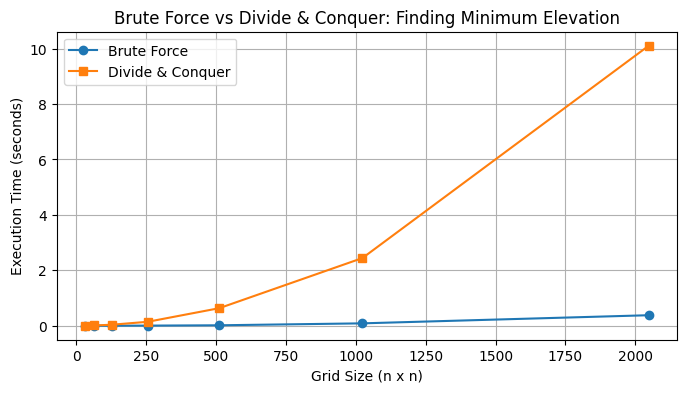

In [13]:

import matplotlib.pyplot as plt

sizes = [32, 64, 128, 256, 512, 1024, 2048]
bf_times = []
dc_times = []

for n in sizes:
    grid = generate_grid(n)
    bf_times.append(timeit.timeit(lambda: brute_force_min(grid), number=3))
    dc_times.append(timeit.timeit(lambda: find_min_elevation(grid), number=3))

plt.figure(figsize=(8, 4))
plt.plot(sizes, bf_times, label='Brute Force', marker='o')
plt.plot(sizes, dc_times, label='Divide & Conquer', marker='s')
plt.xlabel('Grid Size (n x n)')
plt.ylabel('Execution Time (seconds)')
plt.title('Brute Force vs Divide & Conquer: Finding Minimum Elevation')
plt.legend()
plt.grid(True)
plt.show()



## 💬 Discussion

| Factor | Brute Force | Divide & Conquer |
|--------|--------------|------------------|
| Correctness | ✅ Always correct | ✅ Always correct |
| Time Complexity | O(n²) | O(n²) |
| Memory Footprint | High (whole grid in memory) | Lower (works on smaller subgrids) |
| Parallelization | ❌ Sequential only | ✅ Easily parallelized |
| I/O Efficiency | ❌ Poor spatial locality | ✅ Processes contiguous subblocks |
| Checkpointing | ❌ None | ✅ Natural recursion checkpoints |

Even though both have the same *theoretical* complexity, the **Divide & Conquer** approach can dramatically outperform brute force in large-scale or distributed environments.

It also shows how **algorithmic structure** (not just asymptotic complexity) affects *real-world performance*.

However our Empirical measurements show, brute force beating Divide and Conquer, could be because of recursive overhead - here these subdivisions could have been handled by separte cores or even distributed systems (other CPUs) however overhead could be significant in transferring data.


In [14]:
## TODO explore why the divide and conquer approach has this seemingly extra overhead